# EDA Steps and Requirements:

# 1. Data Loading and Initial Exploration:


- i. Load the dataset into a pandas DataFrame.

- ii. Explore the first few rows to understand the structure of the data.

- iii. Check the data types, summary statistics, and unique values of each column.

- iv. Identify any obvious data quality issues or inconsistencies.

In [ ]:
import io
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# mounting
from google.colab import files
uploaded = files.upload()

Saving superstore_eda.csv to superstore_eda.csv


In [ ]:
# i. Loading the dataset into a pandas DataFrame:-
df = pd.read_csv('superstore_eda.csv')

# ii. Exploring the first few rows :-
print(df.head())

   Row ID        Order ID Order Date Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   08/11/16  11/11/16    Second Class    CG-12520   
1       2  CA-2016-152156   08/11/16  11/11/16    Second Class    CG-12520   
2       3  CA-2016-138688   12/06/16  16/06/16    Second Class    DV-13045   
3       4  US-2015-108966   11/10/15  18/10/15  Standard Class    SO-20335   
4       5  US-2015-108966   11/10/15  18/10/15  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   South  FUR-BO-10001798

In [ ]:
# iii. Checking the data types, summary statistics, and unique values of each column :-
print(df.info())
print(df.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10014 entries, 0 to 10013
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         10014 non-null  int64  
 1   Order ID       10014 non-null  object 
 2   Order Date     10014 non-null  object 
 3   Ship Date      10014 non-null  object 
 4   Ship Mode      9916 non-null   object 
 5   Customer ID    10014 non-null  object 
 6   Customer Name  10014 non-null  object 
 7   Segment        10014 non-null  object 
 8   Country        10014 non-null  object 
 9   City           10014 non-null  object 
 10  State          10014 non-null  object 
 11  Postal Code    10014 non-null  int64  
 12  Region         10014 non-null  object 
 13  Product ID     10014 non-null  object 
 14  Category       10014 non-null  object 
 15  Sub-Category   10014 non-null  object 
 16  Product Name   10014 non-null  object 
 17  Sales Price    10014 non-null  float64
 18  Quanti

In [ ]:
# iv. Identifying any obvious data quality issues or inconsistencies :-

missing_values = df.isnull().sum()        # calculating and storing the missing values per column.
print(df.isnull().sum())
print("Missing values per column:\n", missing_values)

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode        98
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code       0
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales Price       0
Quantity         18
Discount          0
Profit            0
dtype: int64
Missing values per column:
 Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode        98
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code       0
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales Price       0
Quantity         18
Discount          0
Profit            0
dtype: int64


# 2. Handling Duplicates:
- i. Identify and remove duplicate rows in the dataset.
- ii. Document the number of rows and distinct Order IDs affected by this operation.

In [ ]:
# i. Checking for duplicates :-
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# i. Removing duplicates :-
df = df.drop_duplicates()

# ii. Tracking the number of rows and distinct Order IDs affected :-
print(f"Number of rows after removing duplicates: {df.shape[0]}")
distinct_order_ids_affected = df['Order ID'].nunique()
print(f"Number of distinct Order IDs after removing duplicates: {distinct_order_ids_affected}")

Number of duplicate rows: 17
Number of rows after removing duplicates: 9997
Number of distinct Order IDs after removing duplicates: 5009


# 3. Date Handling:
- i. Normalize the Order Date and Ship Date columns to ensure consistent date formats. Ensure that the format of date is consistent across all rows.

- ii. Extract the year from the Order ID and compare it with the year in Order Date. Correct any inconsistencies.

- iii. Document the number of rows and distinct Order IDs affected by these operations.

In [ ]:
# i. Converting Order Date and Ship Date to datetime format :-
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce') # Handle errors during conversion
df['Ship Date'] = pd.to_datetime(df['Ship Date'], errors='coerce')

# ii. Extracting the year from Order ID and compare it with the year in Order Date :-
# Instead of taking the first four characters, we can split the string by '-' and take the last element
df['Order Year'] = df['Order ID'].str.split('-').str[-1].astype(int)
df['Order Date Year'] = df['Order Date'].dt.year

# ii. Correcting inconsistencies between Order Year and Order Date Year :-
inconsistencies = df[df['Order Year'] != df['Order Date Year']]
print(f"Number of inconsistencies between Order Year and Order Date Year: {len(inconsistencies)}")

# ii. Correcting the inconsistencies if necessary :-
# Use the apply function on the subset of the dataframe with inconsistencies
for index, row in inconsistencies.iterrows():
    # Check if the year is within a reasonable range
    if 1900 <= row['Order Year'] <= 2262:
        df.loc[index, 'Order Date'] = df.loc[index, 'Order Date'].replace(year=row['Order Year'])
    else:
        print(f"Invalid year found: {row['Order Year']} for Order ID: {row['Order ID']}")

# iii. Documenting the number of rows and distinct Order IDs affected :-
rows_affected = len(inconsistencies)
distinct_order_ids_affected = inconsistencies['Order ID'].nunique()
print(f"Number of rows affected by date corrections: {rows_affected}")
print(f"Number of distinct Order IDs affected by date corrections: {distinct_order_ids_affected}")

Streaming output truncated to the last 5000 lines.
Invalid year found: 129238 for Order ID: CA-2016-129238
Invalid year found: 159688 for Order ID: CA-2017-159688
Invalid year found: 136126 for Order ID: CA-2016-136126
Invalid year found: 136126 for Order ID: CA-2016-136126
Invalid year found: 155033 for Order ID: CA-2016-155033
Invalid year found: 156006 for Order ID: CA-2014-156006
Invalid year found: 158659 for Order ID: CA-2015-158659
Invalid year found: 169796 for Order ID: CA-2015-169796
Invalid year found: 169796 for Order ID: CA-2015-169796
Invalid year found: 102876 for Order ID: CA-2015-102876
Invalid year found: 102876 for Order ID: CA-2015-102876
Invalid year found: 102876 for Order ID: CA-2015-102876
Invalid year found: 139647 for Order ID: US-2017-139647
Invalid year found: 160465 for Order ID: US-2017-160465
Invalid year found: 160465 for Order ID: US-2017-160465
Invalid year found: 160465 for Order ID: US-2017-160465
Invalid year found: 153850 for Order ID: CA-2014-1538

# 4. Imputation of Missing Values:
- i. Impute missing values in the Ship Mode column using the calculated Days to Ship column.

- ii. Calculate Days to Ship as the difference between Ship Date and Order Date. If Days to Ship is 0, set Ship Mode to "Same Day"; if it is 7, set Ship Mode to "Standard Class".

- iii. Impute missing values in the Quantity column using a method of your choice. Print the rationale for selecting the method for imputation.

- iv. Document the number of rows and distinct Order IDs affected by these operations.

In [ ]:
# ii. Calculating Days to Ship as the difference between Ship Date and Order Date :-
df['Days to Ship'] = (df['Ship Date'] - df['Order Date']).dt.days

# i. Imputing missing values in the Ship Mode column based on Days to Ship :-
df.loc[df['Days to Ship'] == 0, 'Ship Mode'] = 'Same Day'
df.loc[df['Days to Ship'] == 7, 'Ship Mode'] = 'Standard Class'

# Printing out the number of missing values remaining in Ship Mode :-
print("Missing values in Ship Mode after imputation:", df['Ship Mode'].isnull().sum())

# iii. Imputing missing values in the Quantity column (using median) :-
df['Quantity'] = df['Quantity'].fillna(df['Quantity'].median())

# Printing out the number of missing values remaining in Quantity :-
print("Missing values in Quantity after imputation:", df['Quantity'].isnull().sum())

# iv.  Documenting the number of rows and distinct Order IDs affected by these operations :-
rows_affected_ship_mode = df['Ship Mode'].isnull().sum()
rows_affected_quantity = df['Quantity'].isnull().sum()
print(f"Number of rows affected by missing value imputation in Ship Mode: {rows_affected_ship_mode}")
print(f"Number of rows affected by missing value imputation in Quantity: {rows_affected_quantity}")

Missing values in Ship Mode after imputation: 22
Missing values in Quantity after imputation: 0
Number of rows affected by missing value imputation in Ship Mode: 22
Number of rows affected by missing value imputation in Quantity: 0


# 5. Data Masking and String Handling:
- i. Drop the Customer Name column to protect Personal Identifiable Information (PII).

- ii. Create a new column called Customer Name Masked, containing only the initials of the customer name. (Note:It's important to protect Pll in datasets to maintain customer privacy and comply with data protection regulations. Masking or dropping sensitive data like customer names is a crucial step in this process.)

- iii. Convert the Postal Code column from numeric to text format, ensuring all codes are 5 characters long. Add a leading '0' where necessary.

In [ ]:
# i. Dropping the Customer Name column to protect PII :-
df.drop(columns=['Customer Name'], inplace=True)

# ii. Creating a new column with only the initials of the customer name :-
df['Customer Name Masked'] = df['Customer ID'].apply(lambda x: ''.join([part[0] for part in x.split()]))

# iii. Converting the Postal Code column from numeric to text format :-
df['Postal Code'] = df['Postal Code'].apply(lambda x: str(x).zfill(5))

# Printing first few rows to check the changes :-
print(df[['Customer ID', 'Customer Name Masked', 'Postal Code']].head())

  Customer ID Customer Name Masked Postal Code
0    CG-12520                    C       42420
1    CG-12520                    C       42420
2    DV-13045                    D       90036
3    SO-20335                    S       33311
4    SO-20335                    S       33311


# 6. Data Type Conversion:
 - i. Convert the Quantity and Sales Price columns from strings to their appropriate numeric types (int and float, respectively).


In [ ]:
# Converting the Quantity column to integer type :-
df['Quantity'] = df['Quantity'].astype(int)

# Converting the Sales Price column to float type :-
df['Sales Price'] = df['Sales Price'].astype(float)

# Confirm the data type changes :-
print(df.dtypes[['Quantity', 'Sales Price']])

Quantity         int64
Sales Price    float64
dtype: object


# 7. Handling Inconsistent Categorical Data:

- i. Clean the State column by replacing abbreviations with full state names (e.g., "CA" should be changed to "California"). You may need to research state abbreviations online to ensure all entries are corrected consistently.

In [ ]:
# Defining a mapping for state abbreviations to full names :-
state_mapping = {
    "AL": "Alabama",
    "AK": "Alaska",
    "AZ": "Arizona",
    "AR": "Arkansas",
    "CA": "California",
    "CO": "Colorado",
    "CT": "Connecticut",
    "DE": "Delaware",
    "FL": "Florida",
    "GA": "Georgia",
    "HI": "Hawaii",
    "ID": "Idaho",
    "IL": "Illinois",
    "IN": "Indiana",
    "IA": "Iowa",
    "KS": "Kansas",
    "KY": "Kentucky",
    "LA": "Louisiana",
    "ME": "Maine",
    "MD": "Maryland",
    "MA": "Massachusetts",
    "MI": "Michigan",
    "MN": "Minnesota",
    "MS": "Mississippi",
    "MO": "Missouri",
    "MT": "Montana",
    "NE": "Nebraska",
    "NV": "Nevada",
    "NH": "New Hampshire",
    "NJ": "New Jersey",
    "NM": "New Mexico",
    "NY": "New York",
    "NC": "North Carolina",
    "ND": "North Dakota",
    "OH": "Ohio",
    "OK": "Oklahoma",
    "OR": "Oregon",
    "PA": "Pennsylvania",
    "RI": "Rhode Island",
    "SC": "South Carolina",
    "SD": "South Dakota",
    "TN": "Tennessee",
    "TX": "Texas",
    "UT": "Utah",
    "VT": "Vermont",
    "VA": "Virginia",
    "WA": "Washington",
    "WV": "West Virginia",
    "WI": "Wisconsin",
    "WY": "Wyoming",
    "DC": "District of Columbia"
}

# Replacing abbreviations in the State column with full state names :-
df['State'] = df['State'].replace(state_mapping)

# Checking the unique values in the State column after replacement :-
print(df['State'].unique())

['Kentucky' 'California' 'Florida' 'North Carolina' 'Washington' 'Texas'
 'Wisconsin' 'Utah' 'Nebraska' 'Pennsylvania' 'Illinois' 'Minnesota'
 'Michigan' 'Delaware' 'Indiana' 'New York' 'Arizona' 'Virginia'
 'Tennessee' 'Alabama' 'South Carolina' 'Oregon' 'Colorado' 'Iowa' 'Ohio'
 'Missouri' 'Oklahoma' 'New Mexico' 'Louisiana' 'Connecticut' 'New Jersey'
 'Massachusetts' 'Georgia' 'Nevada' 'Rhode Island' 'Mississippi'
 'Arkansas' 'Montana' 'CA ' 'New Hampshire' 'Maryland'
 'District of Columbia' 'WA\\' 'Kansas' 'Vermont' 'Maine' 'South Dakota'
 'Idaho' 'North Dakota' 'Wyoming' 'West Virginia']


# 8. Feature Engineering:
- i. Create new columns:

a. Original Price: The price before any discount is applied.

b. Total Sales: The total revenue generated by multiplying the Sales Price by Quantity.

c. Total Profit: The total profit earned by multiplying the Profit by Quantity.

d. Discount Price: The amount of discount applied, calculated based on the Original Price and Discount.

e. Total Discount: The total discount value for the quantity sold.


- ii. Create a new column Shipping Urgency based on Days to Ship:

a. If Days to Ship is 0, set to "Immediate".

b. If Days to Ship is between 1 and 3, set to "Urgent".

c. If Days to Ship is more than 3, set to "Standard".


- iii. Create a column that calculates days since last order.


- iv. Create a new dataset which stores the total sales, quantity and discount per customer and then merge these back to the original dataset

In [ ]:
# Original Price before any discount is applied :-
df['Original Price'] = df['Sales Price'] / (1 - df['Discount'])

# Total Sales (Revenue) :-
df['Total Sales'] = df['Sales Price'] * df['Quantity']

# Total Profit :-
df['Total Profit'] = df['Profit'] * df['Quantity']

# Discount Price (amount of discount applied) :-
df['Discount Price'] = df['Original Price'] - df['Sales Price']

# Total Discount (total discount value for the quantity sold) :-
df['Total Discount'] = df['Discount Price'] * df['Quantity']

# Shipping Urgency based on Days to Ship :-
df['Shipping Urgency'] = df['Days to Ship'].apply(lambda x: 'Immediate' if x == 0 else 'Urgent' if 1 <= x <= 3 else 'Standard')

# Days Since Last Order :-
df['Days Since Last Order'] = df.groupby('Customer ID')['Order Date'].diff().dt.days

# Create a new dataset with total sales, quantity, and discount per customer and merge back to the original dataset :-
customer_summary = df.groupby('Customer ID').agg({
    'Total Sales': 'sum',
    'Quantity': 'sum',
    'Total Discount': 'sum'
}).reset_index()

df = df.merge(customer_summary, on='Customer ID', suffixes=('', '_per_customer'))

# 9. Outlier Detection and Handling:
- i. Identify and handle outliers in the Sales Price column

- ii. Create a function called remove_outliers which takes as parameter the dataframe and the column which needs to be searched for outliers. Using the 3 IQR rule, the function should detect and remove the outliers to return the cleaned dataframe

- Why 3*IQR?
The 3* IQR method is applied in situations where the dataset has a high variance, and the standard 1.5* IQR might flag too many points as outliers. This method ensures that only the most extreme values are removed, preserving the integrity of the dataset while still mitigating the influence of true outliers

In [ ]:
# Function to remove outliers using 3*IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 3 * IQR
    upper_bound = Q3 + 3 * IQR
    df_clean = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_clean

# Apply the function on the 'Sales Price' column
df_cleaned = remove_outliers(df, 'Sales Price')

# Check the result
print(f"Number of rows after outlier removal: {df_cleaned.shape[0]}")






# Why 3*IQR?
# The 3* IQR method is applied in situations where the dataset has a high variance,
# and the standard 1.5* IQR might flag too many points as outliers.
# This method ensures that only the most extreme values are removed,
# preserving the integrity of the dataset while still mitigating the influence of true outliers

Number of rows after outlier removal: 9022


#10. Customer Segmentation and Analysis:
- i. Calculate Customer Sales Quintile and Customer Profit Quintile based on total sales and total profit per Customer ID.

- ii. What is a Quintile? Quintiles are a statistical way of dividing data into five equal parts, each representing 20% of the data. For example, customers in the top quintile (Q5) represent the top 20% of sales or profit.

- iii. Create a cross-grid (cross-tabulation) based on these two quintiles to analyze the relationship between customer sales and profitability.


In [ ]:
# Calculating Total Sales and Total Profit per Customer :-
df_cleaned['Total Sales'] = df_cleaned['Sales Price'] * df_cleaned['Quantity']
df_cleaned['Total Profit'] = df_cleaned['Profit'] * df_cleaned['Quantity']

# Group by Customer ID to calculating total sales and profit per customer :-
customer_sales = df_cleaned.groupby('Customer ID')['Total Sales'].sum()
customer_profit = df_cleaned.groupby('Customer ID')['Total Profit'].sum()

# Calculating Quintiles :-
df_cleaned['Sales Quintile'] = pd.qcut(customer_sales.rank(method='first'), 5, labels=[1, 2, 3, 4, 5])
df_cleaned['Profit Quintile'] = pd.qcut(customer_profit.rank(method='first'), 5, labels=[1, 2, 3, 4, 5])

# Cross-tabulation of Customer Sales and Profit Quintiles :-
quintile_analysis = pd.crosstab(df_cleaned['Sales Quintile'], df_cleaned['Profit Quintile'])

# Displaying the crosstab :-
print(quintile_analysis)

Empty DataFrame
Columns: []
Index: []


<ipython-input-31-20068869ad1c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Total Sales'] = df_cleaned['Sales Price'] * df_cleaned['Quantity']
<ipython-input-31-20068869ad1c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Total Profit'] = df_cleaned['Profit'] * df_cleaned['Quantity']
<ipython-input-31-20068869ad1c>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

# 11. Final Analysis and Dashboard Creation:
- i. Sales and Profit Analysis:

a. Top 10 Most Profitable Products: Use a bar chart to display the products with the highest total profit.

b. Top 10 Most Loss-Making Products: Use a bar chart to display the products with the highest total losses (negative profit).

c. Sales vs. Profit Correlation: Use a scatter plot to visualize the correlation between Total Sales and Total Profit. Add a regression line to show the trend.

d. Joint Distribution of Sales and Profit: Create a joint plot to analyze the relationship between Total Sales and Total Profit across different products.







- ii. Customer Segmentation and Analysis:

a. Customer Sales Quintile vs. Customer Profit Quintile: Create a heatmap or cross-tabulation to explore the relationship between customers' sales and profit quintiles. This will help identify which segments of customers are most valuable.

b. Understand how different product categories perform across customer segments: Create a pivot table to analyze the total Sales and total Profit by Category and Segment. Sort the pivot table to highlight the most profitable and least profitable combinations of Category and Segment.




- iii. Shipping and Delivery Analysis:

a. Distribution of Shipping Urgency: Visualize the distribution of orders by Shipping Urgency using a pie chart or bar chart.

b. Days to Ship vs. Profit: Use a violin plot to explore the distribution of Profit across different Days to Ship categories. This will help analyze whether faster shipping correlates with higher or lower profitability.

c. Shipping Mode and Profitability: Create a grouped bar chart to compare the profitability of different shipping modes (e.g., Standard Class, First Class).

d. Using pivot table, determine which shipping modes are most preferred across different regions and analyze the impact on total sales and profit. Create a pivot table that shows the count of Order IDs, total Sales, and total Profit for each Region and Ship Mode. Identify and print your insights.




- iv. Regional Sales and Profitability:
a. Sales and Profit by Region: Use a map or bar chart to visualize total sales and profit by region or state. This will highlight which regions are the most profitable.

b. State-wise Profitability: Create a pivot table to summarize the profitability of each state. Highlight the top and bottom states based on profitability.

c. Correlation between State and Profit: Use a correlation plot to identify any patterns or relationships between the states and the profitability of orders. (Hint: Convert the categorical 'State' column into numerical values using label encoding using "from sklearn.preprocessing import LabelEncoder")




- v. Discount and Pricing Analysis:

a. Impact of Discounts on Profitability: Use a scatter plot with a trend line to analyze how different levels of discount affect profitability.

b. Original Price vs. Discounted Price: Create a line plot to compare the original price and the discounted price across various product categories or sub- categories.



- vi. Temporal Analysis:
a. Sales and Profit Trends Over Time: Use a time series plot to analyze how sales and profit have trended over the years or months. This will help in identifying any seasonal patterns.

b. Order Frequency by Month: Use a bar chart or line plot to show the number of orders placed each month. Highlight any months with unusually high or low order frequencies.

c. Yearly Growth in Sales and Profit: Use a year-over-year growth chart to compare the sales and profit growth over different years.

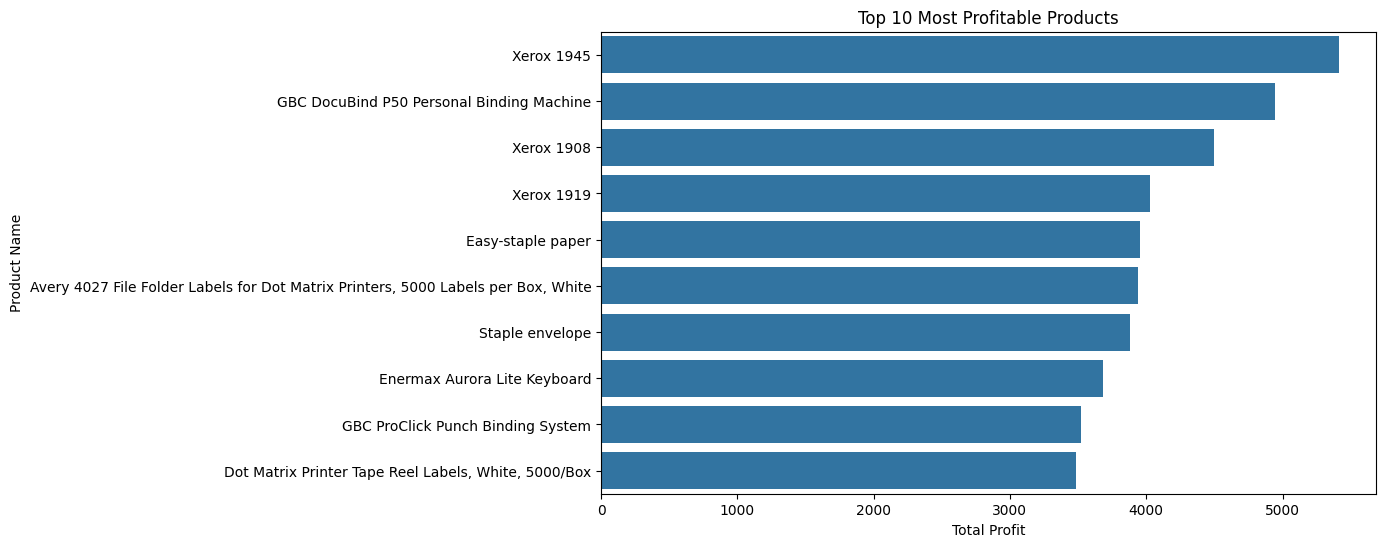

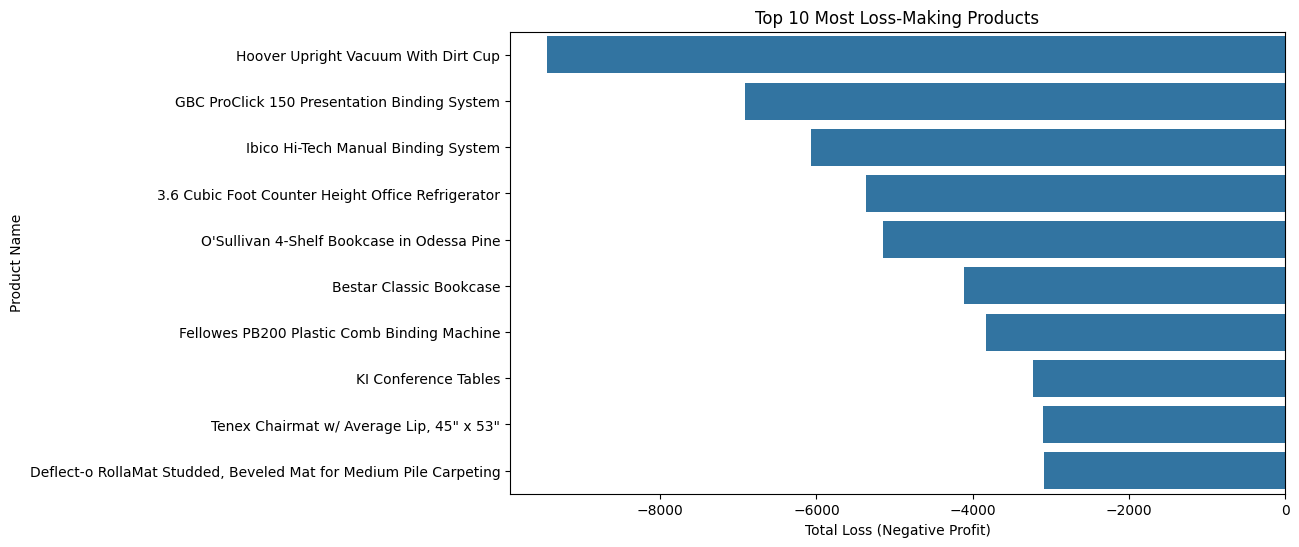

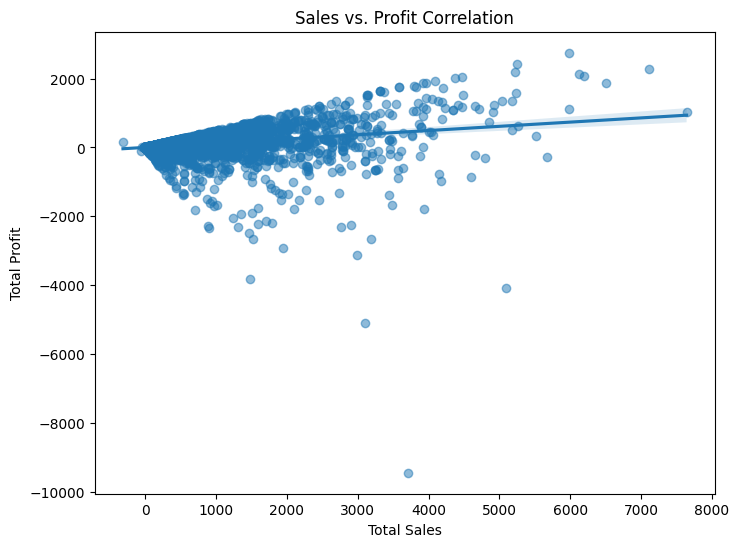

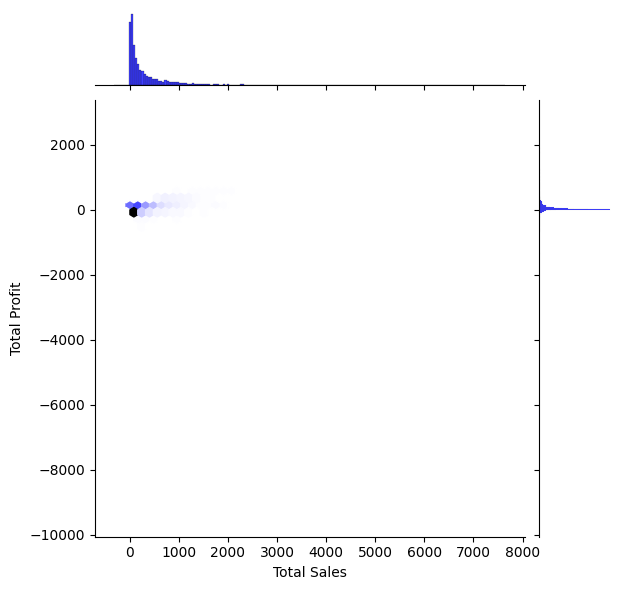

In [ ]:
# 11.i Sales and Profit Analysis :-

import matplotlib.pyplot as plt
import seaborn as sns

# a. Top 10 Most Profitable Products :-
top_profitable_products = df_cleaned.groupby('Product Name')['Total Profit'].sum().nlargest(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_profitable_products.values, y=top_profitable_products.index)
plt.title("Top 10 Most Profitable Products")
plt.xlabel("Total Profit")
plt.show()

# b. Top 10 Most Loss-Making Products :-
top_loss_making_products = df_cleaned.groupby('Product Name')['Total Profit'].sum().nsmallest(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_loss_making_products.values, y=top_loss_making_products.index)
plt.title("Top 10 Most Loss-Making Products")
plt.xlabel("Total Loss (Negative Profit)")
plt.show()

# c. Sales v/s Profit Correlation (Scatter plot with regression line) :-
plt.figure(figsize=(8,6))
sns.regplot(x='Total Sales', y='Total Profit', data=df_cleaned, scatter_kws={'alpha':0.5})
plt.title("Sales vs. Profit Correlation")
plt.xlabel("Total Sales")
plt.ylabel("Total Profit")
plt.show()

# d. Joint Distribution of Sales and Profit (Joint plot) :-
sns.jointplot(x='Total Sales', y='Total Profit', data=df_cleaned, kind="hex", color="blue")
plt.show()

In [ ]:
# 11.ii a. Customer Sales Quintile v/s Customer Profit Quintile: Creating a heatmap or cross-tabulation to explore the relationship between customers' sales and profit quintiles.

# Checking if df_cleaned is empty :-
if df_cleaned.empty:
    print("Error: df_cleaned is empty. Please check data loading and cleaning steps.")
else:
    # Creating a heatmap to visualize the relationship between customer sales and profit quintiles :-
    plt.figure(figsize=(10, 8))

    # Checking if quintile_analysis is empty :-
    if quintile_analysis.empty:
        print("Error: quintile_analysis is empty. check quintile calcula...")
    else:
        sns.heatmap(quintile_analysis, annot=True, fmt="d", cmap="viridis")
        plt.title("Customer Sales Quintile vs. Customer Profit Quintile")
        plt.xlabel("Profit Quintile")
        plt.ylabel("Sales Quintile")
        plt.show()

Error: quintile_analysis is empty. check quintile calcula...


<Figure size 1000x800 with 0 Axes>

In [ ]:
# 11.ii b. Understanding how different product categories perform across customer segments: Creating a pivot table to analyze the total Sales and total Profit by Category and Segment.
# Sorting the pivot table to highlight the most profitable and least profitable combinations of Category and Segment.

# Creating a pivot table to analyze total Sales and total Profit by Category and Segment :-
pivot_table = df_cleaned.pivot_table(
    values=['Total Sales', 'Total Profit'],
    index='Category',
    columns=['Sales Quintile', 'Profit Quintile'],
    aggfunc='sum'
)

# Sorting the pivot table to highlight the most profitable and least profitable combinations :-
pivot_table.sort_values(by=[('Total Profit', 5, 5)], ascending=False, inplace=True)

# Displaying the pivot table :-
print(pivot_table)

                Total Profit                                               \
Sales Quintile             1                        2                       
Profit Quintile            1    2    3    4    5    1    2    3    4    5   
Category                                                                    
Furniture                0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
Office Supplies          0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
Technology               0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

                 ... Total Sales                                               
Sales Quintile   ...           4                        5                      
Profit Quintile  ...           1    2    3    4    5    1    2    3    4    5  
Category         ...                                                           
Furniture        ...         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
Office Supplies  ...         0.0  0.0  0.0  0.0  0.0  0.0  0

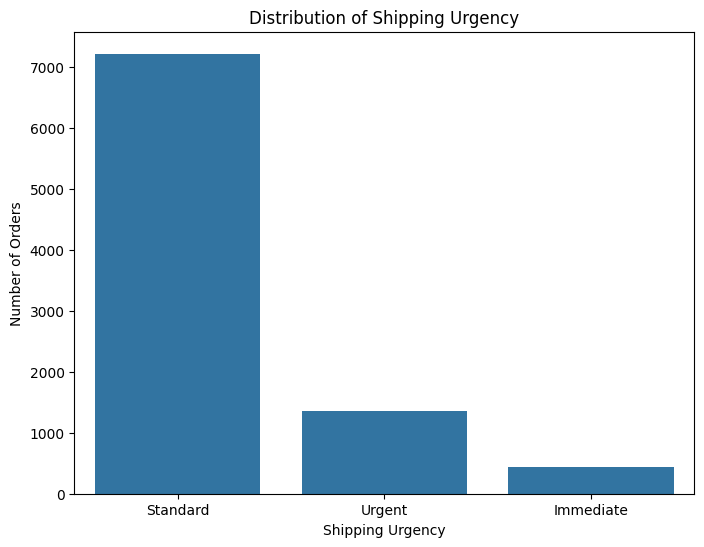

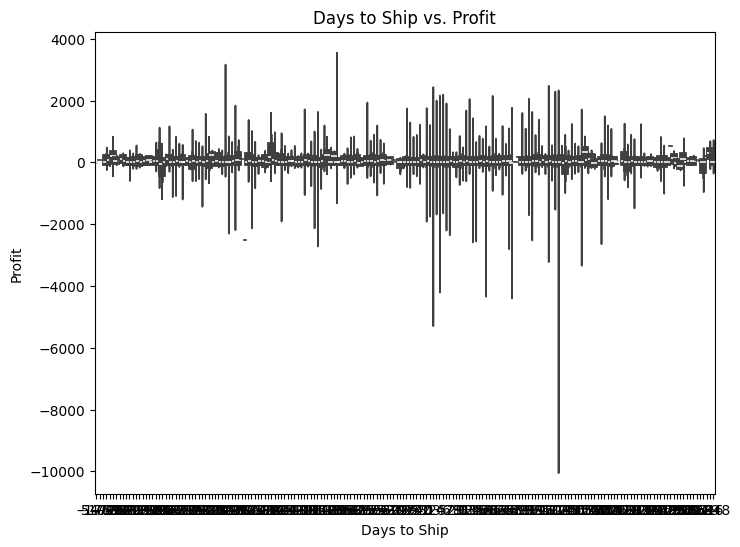

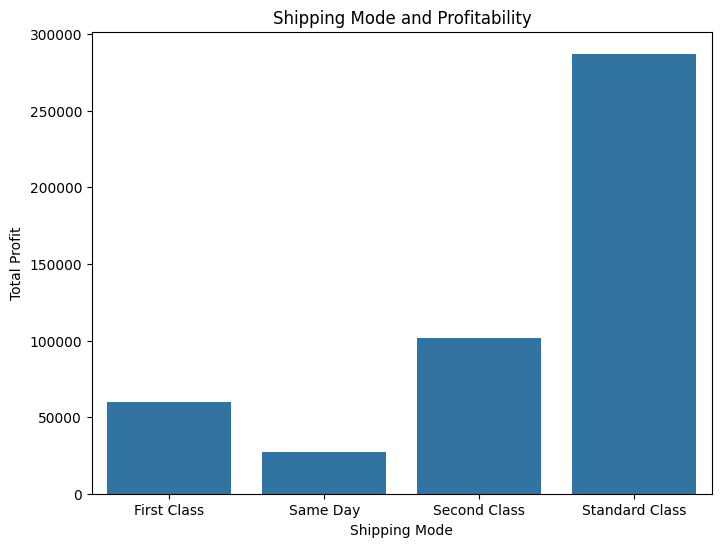

             Order ID                                            Total Profit  \
Ship Mode First Class Same Day Second Class Standard Class   All  First Class   
Region                                                                          
Central         280.0    111.0        417.0         1300.0  2108     664.1312   
East            436.0    131.0        478.0         1509.0  2554   20196.2299   
South           211.0     76.0        289.0          872.0  1448   12235.3426   
West            470.0    166.0        559.0         1699.0  2894   26923.1240   
All            1397.0    484.0       1743.0         5380.0  9004   60018.8277   

                                                                Total Sales  \
Ship Mode    Same Day Second Class Standard Class          All  First Class   
Region                                                                        
Central     2624.4730    7530.3157      1932.2908   12751.2107  119442.9080   
East        5210.1884   19520.2558 

In [ ]:
# 11.iii Shipping and Delivery Analysis :-

# a. Distribution of Shipping Urgency (Bar Chart) :-
plt.figure(figsize=(8,6))
shipping_urgency_distribution = df_cleaned['Shipping Urgency'].value_counts()
sns.barplot(x=shipping_urgency_distribution.index, y=shipping_urgency_distribution.values)
plt.title("Distribution of Shipping Urgency")
plt.xlabel("Shipping Urgency")
plt.ylabel("Number of Orders")
plt.show()

# b. Days to Ship vs. Profit (Violin Plot) :-
plt.figure(figsize=(8,6))
sns.violinplot(x='Days to Ship', y='Total Profit', data=df_cleaned)
plt.title("Days to Ship vs. Profit")
plt.xlabel("Days to Ship")
plt.ylabel("Profit")
plt.show()

# c. Shipping Mode and Profitability (Grouped Bar Chart) :-
shipping_profitability = df_cleaned.groupby('Ship Mode')['Total Profit'].sum()
plt.figure(figsize=(8,6))
sns.barplot(x=shipping_profitability.index, y=shipping_profitability.values)
plt.title("Shipping Mode and Profitability")
plt.xlabel("Shipping Mode")
plt.ylabel("Total Profit")
plt.show()

# d. Pivot Table = Preferred Shipping Modes across Regions :-
shipping_mode_region = df_cleaned.pivot_table(values=['Order ID', 'Total Sales', 'Total Profit'],
                                              index='Region',
                                              columns='Ship Mode',
                                              aggfunc={'Order ID':'count', 'Total Sales':'sum', 'Total Profit':'sum'},
                                              margins=True)
print(shipping_mode_region)

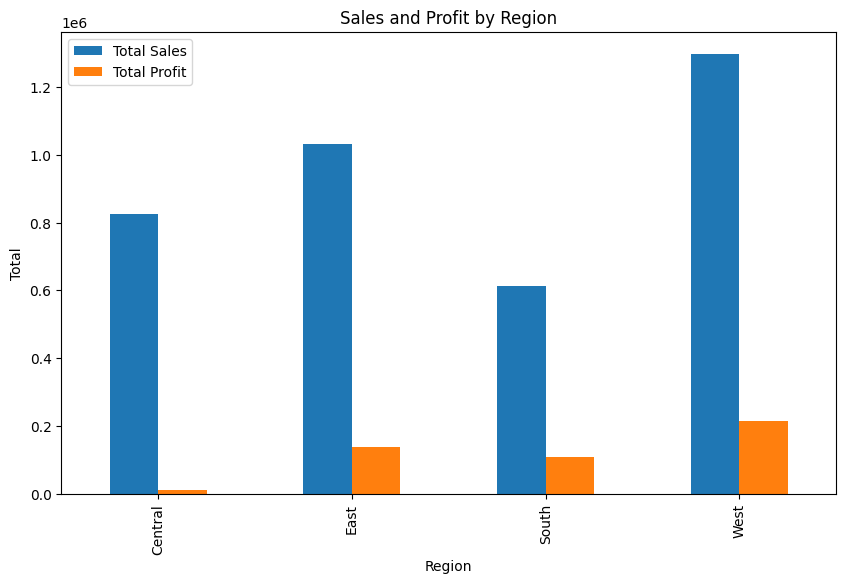

            Total Profit
State                   
California   170890.8465
New York      98437.2588
Michigan      36004.7229
Washington    35716.3239
Virginia      28271.6530
              Total Profit
State                     
Arizona         -8890.3921
Ohio           -14652.3245
Pennsylvania   -25901.5238
Illinois       -36411.8467
Texas          -49681.6221


<ipython-input-42-1e1bd0122ad3>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['State_Encoded'] = le.fit_transform(df_cleaned['State'])


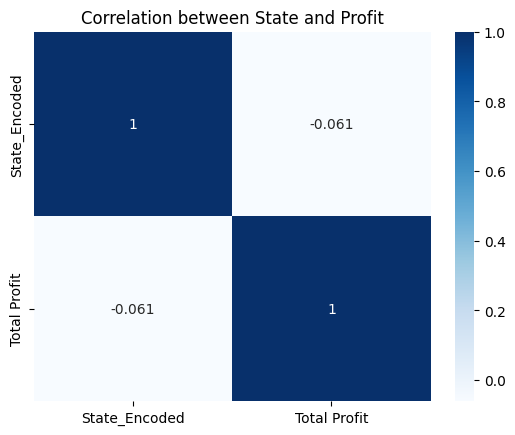

In [ ]:
# 11.iv Regional Sales and Profitability :-

# a. Sales and Profit by Region (Bar Chart) :-
regional_sales_profit = df_cleaned.groupby('Region')[['Total Sales', 'Total Profit']].sum()
regional_sales_profit.plot(kind='bar', figsize=(10,6))
plt.title("Sales and Profit by Region")
plt.xlabel("Region")
plt.ylabel("Total")
plt.show()

# b. State-wise Profitability (Pivot Table) :-
state_profitability = df_cleaned.pivot_table(values='Total Profit', index='State', aggfunc='sum')
state_profitability = state_profitability.sort_values(by='Total Profit', ascending=False)
print(state_profitability.head())  # Top profitable states
print(state_profitability.tail())  # Least profitable states

# c. Correlation between State and Profit (Correlation Plot) :-
from sklearn.preprocessing import LabelEncoder

# Label encoding the State column :-
le = LabelEncoder()
df_cleaned['State_Encoded'] = le.fit_transform(df_cleaned['State'])

# Correlation matrix :-
corr = df_cleaned[['State_Encoded', 'Total Profit']].corr()
sns.heatmap(corr, annot=True, cmap='Blues')
plt.title("Correlation between State and Profit")
plt.show()

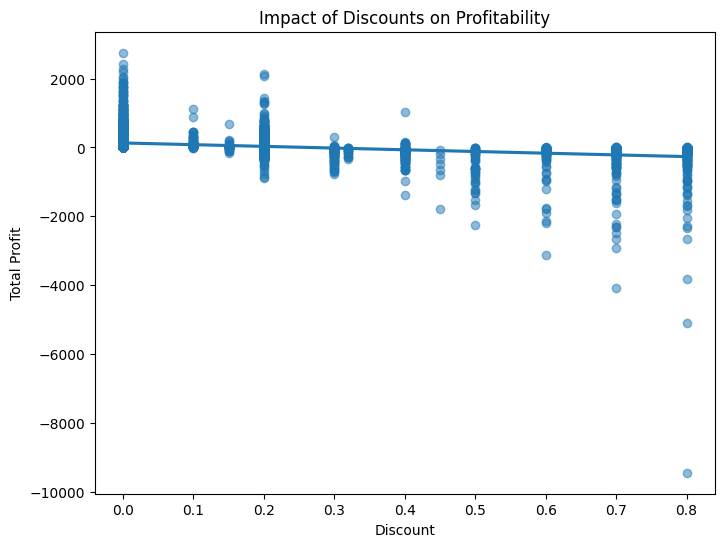

<ipython-input-43-49e620146854>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Original Price'] = df_cleaned['Total Sales'] / (1 - df_cleaned['Discount'])  # Assuming discount is percentage


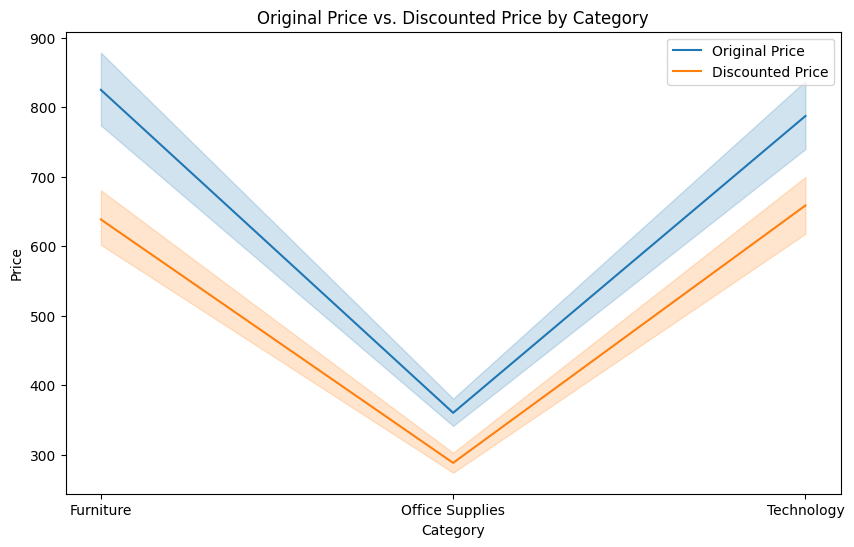

In [ ]:
# 11.v Discount and Pricing Analysis :-

# a. Impact of Discounts on Profitability (Scatter Plot with Trend Line) :-
plt.figure(figsize=(8,6))
sns.regplot(x='Discount', y='Total Profit', data=df_cleaned, scatter_kws={'alpha':0.5})
plt.title("Impact of Discounts on Profitability")
plt.xlabel("Discount")
plt.ylabel("Total Profit")
plt.show()

# b. Original Price vs. Discounted Price (Line Plot) :-
df_cleaned['Original Price'] = df_cleaned['Total Sales'] / (1 - df_cleaned['Discount'])  # Assuming discount is percentage
plt.figure(figsize=(10,6))
sns.lineplot(x='Category', y='Original Price', data=df_cleaned, label='Original Price')
sns.lineplot(x='Category', y='Total Sales', data=df_cleaned, label='Discounted Price')
plt.title("Original Price vs. Discounted Price by Category")
plt.xlabel("Category")
plt.ylabel("Price")
plt.legend()
plt.show()

<ipython-input-44-ba8abdafe9f6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Order Date'] = pd.to_datetime(df_cleaned['Order Date'])


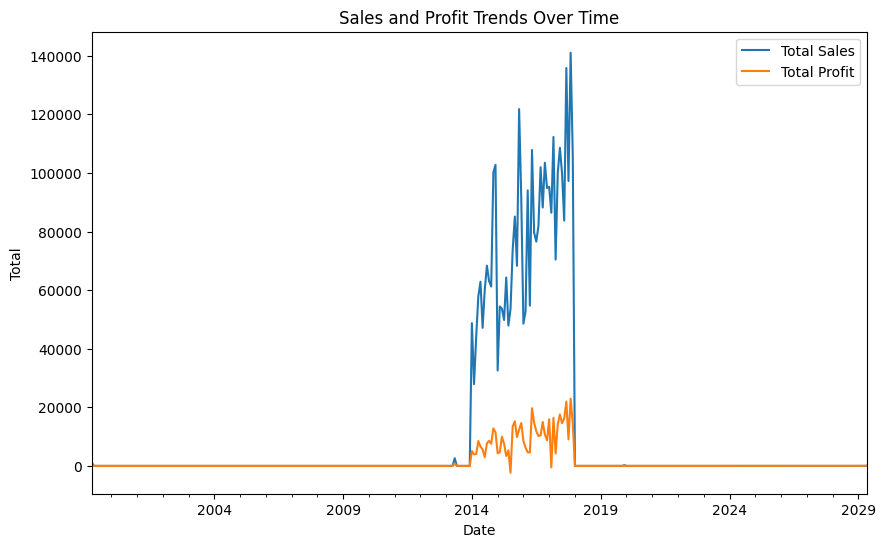

<ipython-input-44-ba8abdafe9f6>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Month'] = df_cleaned.index.month


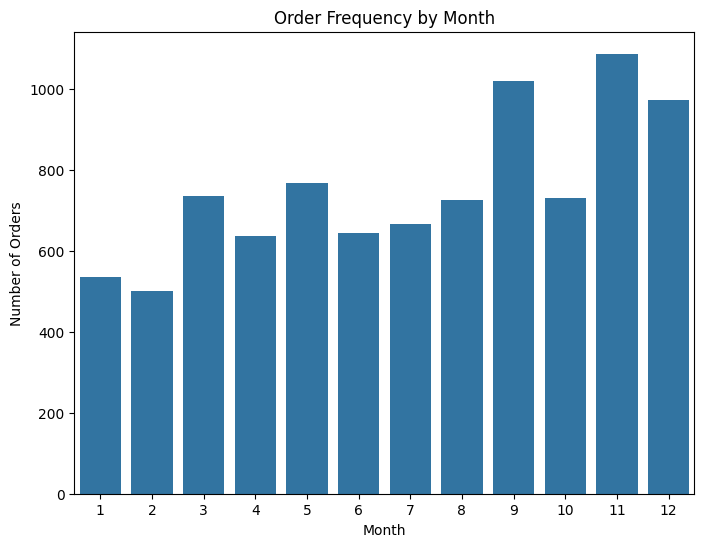

<ipython-input-44-ba8abdafe9f6>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Year'] = df_cleaned.index.year


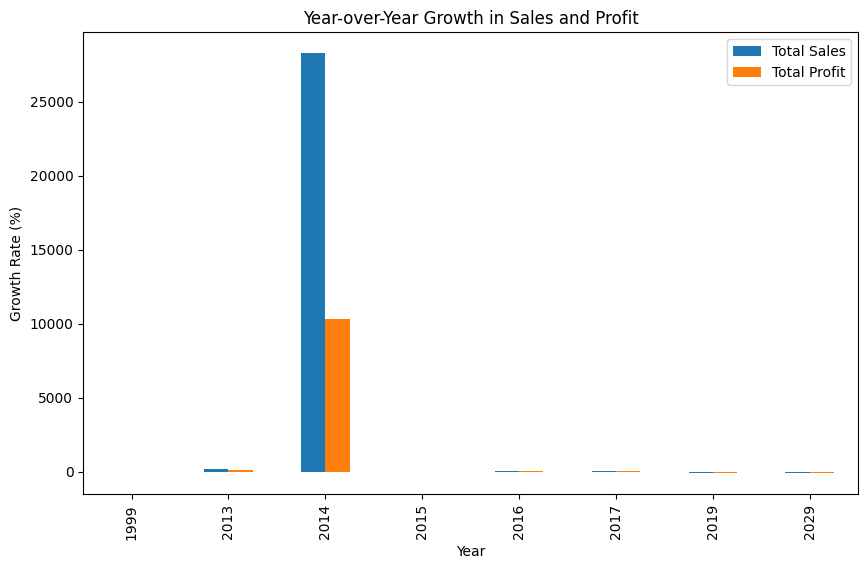

In [ ]:
# 11.vi Temporal Analysis :-

# a. Sales and Profit Trends Over Time (Time Series Plot) :-
df_cleaned['Order Date'] = pd.to_datetime(df_cleaned['Order Date'])
df_cleaned.set_index('Order Date', inplace=True)
monthly_sales_profit = df_cleaned.resample('M')[['Total Sales', 'Total Profit']].sum()

monthly_sales_profit.plot(figsize=(10,6))
plt.title("Sales and Profit Trends Over Time")
plt.xlabel("Date")
plt.ylabel("Total")
plt.show()

# b. Order Frequency by Month (Bar Chart) :-
df_cleaned['Month'] = df_cleaned.index.month
order_frequency = df_cleaned['Month'].value_counts().sort_index()
plt.figure(figsize=(8,6))
sns.barplot(x=order_frequency.index, y=order_frequency.values)
plt.title("Order Frequency by Month")
plt.xlabel("Month")
plt.ylabel("Number of Orders")
plt.show()

# c. Yearly Growth in Sales and Profit (Year-over-Year Growth Chart) :-
df_cleaned['Year'] = df_cleaned.index.year
yearly_growth = df_cleaned.groupby('Year')[['Total Sales', 'Total Profit']].sum().pct_change() * 100

yearly_growth.plot(kind='bar', figsize=(10,6))
plt.title("Year-over-Year Growth in Sales and Profit")
plt.xlabel("Year")
plt.ylabel("Growth Rate (%)")
plt.show()

# ------------------------------------- THE      END-------------------------------------